# Classification by Support Vector Machine

![alt](banner_svm.jpg)

In [1]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

update_geom_defaults("point", list(size=3, colour="grey50"))
update_geom_defaults("line", list(size=0.15))
update_geom_defaults("text", list(size=2.5, vjust=0.5))
update_geom_defaults("segment", list(color="black", size=0.15))

== document setup ==

## Introduction

Motivation, context, history, related topics ...

## Synopsis

**Terms**

* Support vector machine
* Support vector
* Margin
* Boundary

## Exposition

### SVM Applied to Linearly Separable Data

Linearly separable means ...
* 1-dimensional data (i.e., 1 variable) can be separated into non-overlapping classes by a point.
* 2-dimensional data (i.e., 2 variables) can be separated into non-overlapping classes by a line.
* 3-dimensional data (i.e., 3 variables) can be separated into non-overlapping classes by a plane.
* 4+-dimensional data (i.e., 4+ variables) can be separated into non-overlapping classes by a hyper-plane.

#### Data

Consider this dataset and new observation. 

data 
 
 
 x1 
 class 
 
 
 
 
 1 
 A 
 
 
 2 
 A 
 
 
 3 
 A 
 
 
 6 
 A 
 
 
 14 
 B 
 
 
 15 
 B 
 
 
 16 
 B 
 
 
 18 
 B 
 
 
 
 new 
 
 
 x1 
 
 
 
 
 8

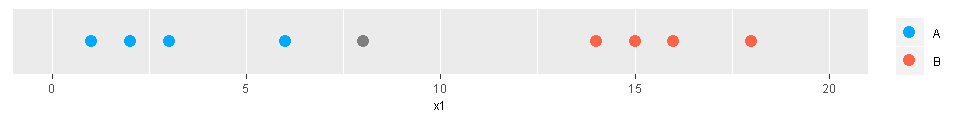

In [2]:
data = data.frame(x1=c(1,2,3,6,14,15,16,18), class=c("A", "A", "A", "A", "B", "B", "B", "B"))
new = data.frame(x1=8)

row.arrange(data %>% captionx, new %>% captionx)

output_size(8,1)
ggplot(data) + xlim(0,20) +
geom_point(aes(x=x1, y=0, color=class)) + geom_point(aes(x=new$x1, y=0)) + theme.x_axis_only
output_size(restore)

#### Find Support Vectors and Boundary
* **Support vectors** are those observations at the edges of the margin separating the classes.
* The **boundary** is the middle of the margin separating the classes.

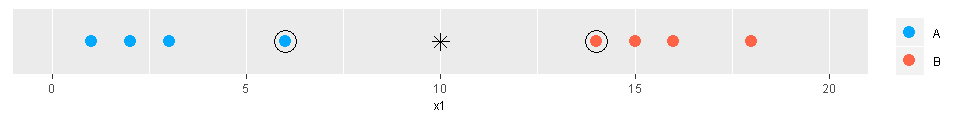

In [3]:
support_vectors = c(6, 14)
boundary = mean(support_vectors)

output_size(8,1)
ggplot(data) + xlim(0,20) +
geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(x=boundary, y=0, shape=8, color="black") +
theme.x_axis_only
output_size(restore)

#### Score & Predict by Score Sign

Score observations based on their distances from the boundary

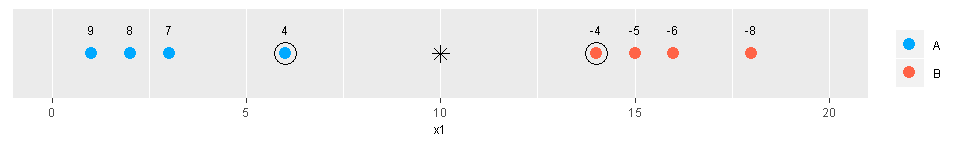

In [4]:
score = (boundary - data$x1)

output_size(8,1.2)
ggplot(data) + xlim(0,20) + ylim(-0.5,0.5) +
geom_point(aes(x=x1, y=0, color=class)) +
geom_text(aes(x=x1, y=0, label=score), nudge_y=0.3) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(x=boundary, y=0, shape=8, color="black") + theme.x_axis_only
output_size(restore)

To predict a new observation's class, find its score in the same way and make the prediction based on its score sign.

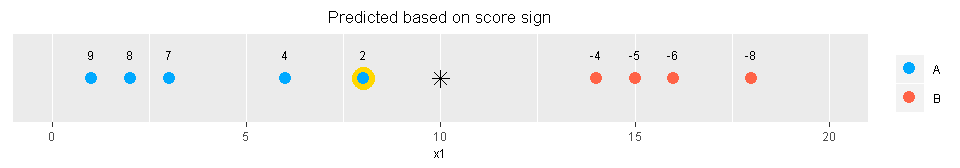

In [5]:
new_score = (boundary - new$x1)

new_color = PALETTE[as.numeric(factor(sign(new_score), levels=c(1,-1), labels=c(1,2)))]    

output_size(8,1.4)
ggplot(data) + ggtitle("Predicted based on score sign") + xlim(0,20) + ylim(-0.5,0.5) +
geom_point(aes(x=x1, y=0, color=class)) +
geom_text(aes(x=x1, y=0, label=score), nudge_y=0.3) +
geom_point(x=new$x1, y=0, size=6, color="gold") + geom_point(x=new$x1, y=0, color=new_color) +
geom_text(aes(x=new$x1, y=0, label=new_score), nudge_y=0.3) +
geom_point(x=boundary, y=0, shape=8, color="black") +
theme.x_axis_only 
output_size(restore)

#### Score & Predict by Probability

Alternatively, score observations in a different way, interpret the scores as probabilities, and predict based on probability.

(Various implementations of the support vector machine method employ various schemes to determine probabilities - and may even incorporate some randomization due to cross-validation.)

Note that the sigmoid function rescales any value into the range 0 to 1.  The sigmoid function is also known as the logistic function.

sigmoid:  $\large \frac{1}{(1+{e}^{−x})}$

sigmoid range: $0 < sigmoid(x) < 1$, for any $x$

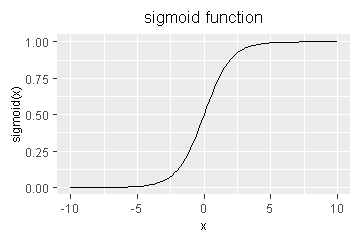

In [6]:
output_size(3,2)
ggplot(data.frame(0))+ ggtitle("sigmoid function") + xlim(-10,10) + xlab("x") + ylab("sigmoid(x)") +
stat_function(fun=sigmoid, color="black") 
output_size(restore)

First, score observations based on their distances from the boundary

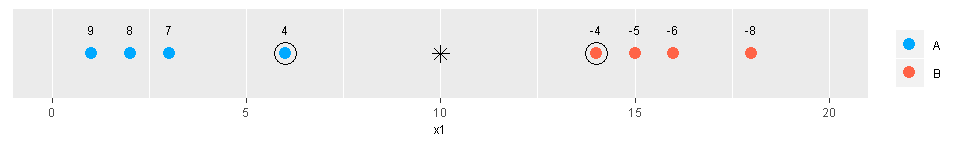

In [7]:
score = (boundary - data$x1)

output_size(8,1.2)
ggplot(data) + xlim(0,20) + ylim(-0.5,0.5) +
geom_point(aes(x=x1, y=0, color=class)) +
geom_text(aes(x=x1, y=0, label=score), nudge_y=0.3) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(x=boundary, y=0, shape=8, color="black") + theme.x_axis_only
output_size(restore)

Second, re-scale the scores so that observations on the margin edges have score 1.  This step provides for scores to be distributed in an intuitive way.

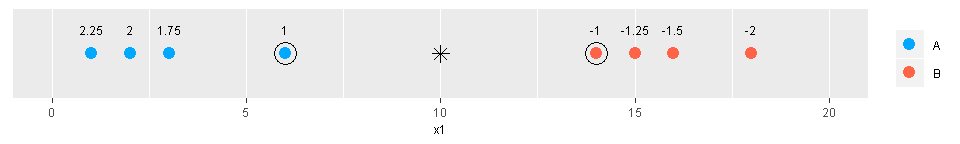

In [8]:
score = (boundary - data$x1) / (boundary - data$x1[4])

output_size(8,1.2)
ggplot(data) + xlim(0,20) + ylim(-0.5,0.5) +
geom_point(aes(x=x1, y=0, color=class)) +
geom_text(aes(x=x1, y=0, label=score), nudge_y=0.3) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(x=boundary, y=0, shape=8, color="black") +
theme.x_axis_only
output_size(restore)

Third, further re-scale the scores to the range 0 to 1.  Use the sigmoid function to do this.  This step provides for scores to be interpreted as probabilities.

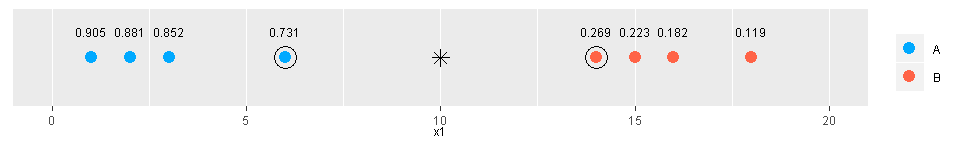

In [9]:
score = sigmoid((boundary - data$x1) / (boundary - data$x1[4]))

output_size(8,1.2)
ggplot(data) + xlim(0,20) + ylim(-0.5,0.5) +
geom_point(aes(x=x1, y=0, color=class)) +
geom_text(aes(x=x1, y=0, label=sprintf("%0.3f", score)), nudge_y=0.3) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(x=boundary, y=0, shape=8, color="black") +
theme.x_axis_only
output_size(restore)

To predict a new observation's class, find its score in the same way, interpret the score as a probability, and make a prediction based on the probability.

Use the probability with a  cutoff to make a prediction.

x1,new.score,prob.A,prob.B
8,0.6224593,0.6224593,0.3775407


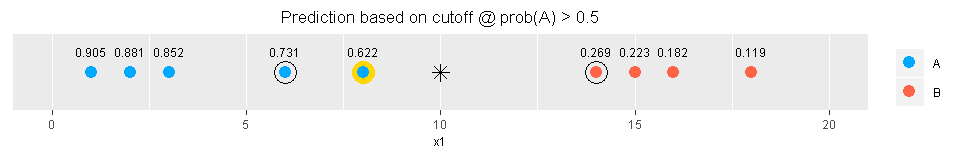

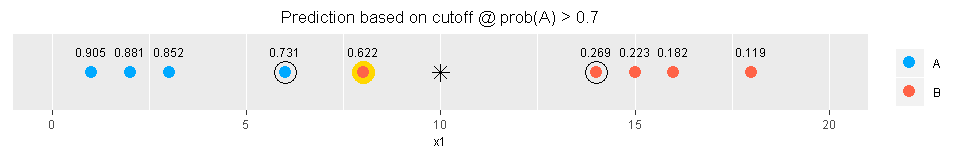

In [10]:
data.score = sigmoid((boundary - data$x1) / (boundary - data$x1[4]))
new.score = sigmoid((boundary - new$x1) / (boundary - data$x1[4]))
data.frame(new, new.score, prob.A=new.score, prob.B=1-new.score) %>% caption("new")

cutoff = 0.5
new_color = PALETTE[as.numeric(factor(new.score>=cutoff, levels=c(TRUE,FALSE), labels=c(1,2)))] 

output_size(8,1.3)
ggplot(data) + ggtitle("Prediction based on cutoff @ prob(A) > 0.5") + xlim(0,20) + ylim(-0.5, 0.5) + 
geom_point(aes(x=x1, y=0, color=class)) +
geom_text(aes(x=x1, y=0, label=sprintf("%0.3f", data.score)), nudge_y=0.3) + 
geom_point(x=new$x1, y=0, size=6, color="gold") + geom_point(x=new$x1, y=0, color=new_color) +
geom_text(aes(x=new$x1, y=0, label=sprintf("%0.3f", new.score)), nudge_y=0.3) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(x=boundary, y=0, shape=8, color="black") +
theme.x_axis_only 
output_size(restore)

cutoff = 0.7
new_color = PALETTE[as.numeric(factor(new.score>=cutoff, levels=c(TRUE,FALSE), labels=c(1,2)))] 

output_size(8,1.3)
ggplot(data) + ggtitle("Prediction based on cutoff @ prob(A) > 0.7") + xlim(0,20) + ylim(-0.5, 0.5) + 
geom_point(aes(x=x1, y=0, color=class)) +
geom_text(aes(x=x1, y=0, label=sprintf("%0.3f", data.score)), nudge_y=0.3) + 
geom_point(x=new$x1, y=0, size=6, color="gold") + geom_point(x=new$x1, y=0, color=new_color) +
geom_text(aes(x=new$x1, y=0, label=sprintf("%0.3f", new.score)), nudge_y=0.3) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(x=boundary, y=0, shape=8, color="black") +
theme.x_axis_only 
output_size(restore)

### SVM Applied to Not Linearly Separable Data: Penalties

#### Data
Note, these observations are not linearly separable. 

data 
 
 
 x1 
 class 
 
 
 
 
 2 
 A 
 
 
 3 
 A 
 
 
 4 
 B 
 
 
 5 
 A 
 
 
 20 
 B 
 
 
 21 
 B 
 
 
 22 
 B 
 
 
 23 
 B 
 
 
 
 new 
 
 
 x1 
 
 
 
 
 12

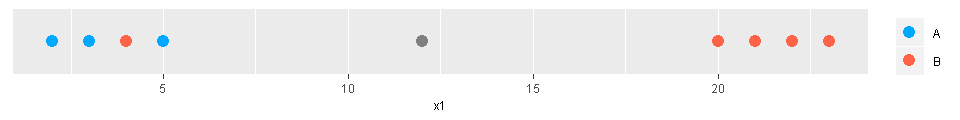

In [11]:
data = data.frame(x1=c(2,3,4,5, 20,21,22,23), class=c("A","A","B","A", "B","B","B","B"))
new = data.frame(x1=12)

row.arrange(data %>% captionx, new %>% captionx)

output_size(8,1)
ggplot(data) + geom_point(aes(x=x1, y=0, color=class)) + geom_point(x=new$x1, y=0) + theme.x_axis_only
output_size(restore)

#### Find Support Vectors and Boundary, Assign Penalties
* **Support vectors** are those observations at the edges of the margin separating the classes and any observations on the wrong side of the boundary.  The support vectors are determined so that the margin is maximized, but subject to a penalty to account for the offending observations.  The penalty depends on the cost and the offending observations' distances from the correct edges.  You choose the cost. 
* The **boundary** is the middle of the margin separating the classes.

Consider observation x1=5 and observation x1=20 as candidates for the support vectors.  The gap would be 20-5=15, but observation x1=4 would be distance 16 on the wrong side of the x1=20 edge.  If cost was chosen as 0.1, then the penalty would be 0.1x16=1.6, and so the gap with penalty would be 15-1.6=13.4.  Similarly, if cost was chosen as 1 or 10, then the gap with penalty would be 15-(1x16)=-1 or 15-(10x16)=-145, respectively.    

cost,gap,offense,penalty,gap_with_penalty
0.1,15,16,1.6,13.4
1.0,15,16,16.0,-1.0
10.0,15,16,160.0,-145.0


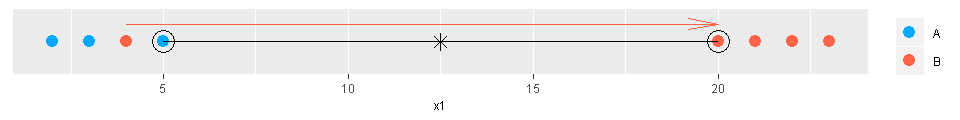

In [12]:
support_vectors = c(5,20)
boundary = mean(data$x1[4:5])

cost = c(0.1,1,10)
gap = data$x1[5] - data$x1[4]
offense = abs(data$x1[5] - data$x1[3])
penalty = cost*offense
data.frame(cost, gap, offense, penalty, gap_with_penalty=gap-penalty)

output_size(8,1)
ggplot(data) + geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(aes(x=boundary, y=0), shape=8, color="black") +
geom_segment(aes(x=data$x1[4], y=0, xend=data$x1[5], yend=0)) +
geom_segment(aes(x=data$x1[3], y=0.3, xend=data$x1[5], yend=0.3), color=PALETTE[2], arrow=arrow(angle=10)) +
ylim(-0.5, 0.5) + theme.x_axis_only
output_size(restore)

Consider observation x1=3 and observation x1=20 as candiates for the support vectors.  The gap would be 20-3=17, but observation x1=4 would be distance 16 on wrong side of the x1=20 edge, and observation x1=5 would be distance 2 on the wrong side of the x1=3 edge.  If cost was chosen as 0.1, then the penalty would be 0.1x(16+2)=1.8, and so the gap with penalty would be 17-1.8=15.2.  Similarly, if cost was chosen as 1 or 10, then the gap with penalty would be 17-(1x(16+2))=-1 or 17-(10x(16+2))=-163, respectively. 

cost,gap,offense_2,offense_3,penalty,gap_with_penalty
0.1,17,2,16,1.8,15.2
1.0,17,2,16,18.0,-1.0
10.0,17,2,16,180.0,-163.0


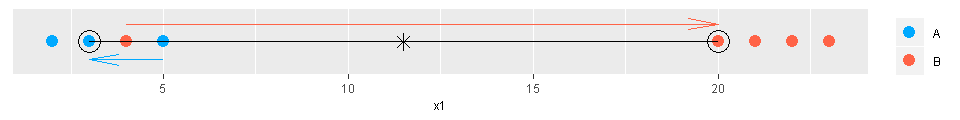

In [13]:
support_vectors = c(3,20)
boundary = mean(data$x1[c(2,5)])

cost = c(0.1,1,10)
gap = data$x1[5] - data$x1[2]
offense_3 = abs(data$x1[5] - data$x1[3])
offense_2 = abs(data$x1[4] - data$x1[2])
penalty = cost*offense_2 + cost*offense_3
data.frame(cost, gap, offense_2, offense_3, penalty, gap_with_penalty=gap-penalty)

output_size(8,1)
ggplot(data) + geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(aes(x=boundary, y=0), shape=8, color="black") +
geom_segment(aes(x=data$x1[2], y=0, xend=data$x1[5], yend=0)) +
geom_segment(aes(x=data$x1[3], y=0.3, xend=data$x1[5], yend=0.3), color=PALETTE[2], arrow=arrow(angle=10)) +
geom_segment(aes(x=data$x1[4], y=-0.3, xend=data$x1[2], yend=-0.3), color=PALETTE[1], arrow=arrow(angle=10)) +
ylim(-0.5, 0.5) + theme.x_axis_only
output_size(restore)

Note, the choice of cost influences the determination of the support vectors, which determine the boundary.  In our example, at cost=0.1, observations x1=3 and x1=20 would be preferred over observations x1=5 and x1=20 as support vectors because 15.2 > 13.4.  A new observation x1=12 would be classified by sign as B.  At cost=10, the reverse would be preferred because -145 > -163, and a new observation x1=12 would be classified by sign as A.

The support vector machine method relies on an optimization algorithm to find the support vectors by maximizing the penalized space between edges. 

x1
12


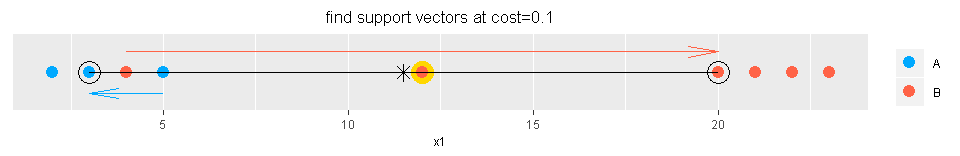

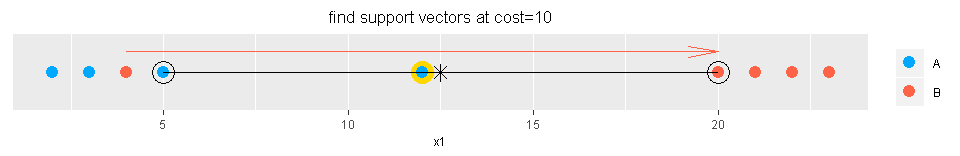

In [14]:
new %>% caption

support_vectors = c(3,20)
boundary = mean(data$x1[c(2,5)])

output_size(8,1.3)
ggplot(data) + ggtitle("find support vectors at cost=0.1") + ylim(-0.5, 0.5) + 
geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(aes(x=new$x1, y=0), size=6, color="gold") + geom_point(aes(x=new$x1, y=0), color=PALETTE[2]) +
geom_point(aes(x=boundary, y=0), shape=8, color="black") +
geom_segment(aes(x=data$x1[2], y=0, xend=data$x1[5], yend=0)) +
geom_segment(aes(x=data$x1[3], y=0.3, xend=data$x1[5], yend=0.3), color=PALETTE[2], arrow=arrow(angle=10)) +
geom_segment(aes(x=data$x1[4], y=-0.3, xend=data$x1[2], yend=-0.3), color=PALETTE[1], arrow=arrow(angle=10)) +
theme.x_axis_only
output_size(restore)

support_vectors = c(5,20)
boundary = mean(data$x1[4:5])

output_size(8,1.3)
ggplot(data) + ggtitle("find support vectors at cost=10") + ylim(-0.5, 0.5) + 
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=new$x1, y=0), size=6, color="gold") + geom_point(aes(x=new$x1, y=0), color=PALETTE[1]) +
geom_point(aes(x=boundary, y=0), shape=8, color="black") +
geom_segment(aes(x=data$x1[4], y=0, xend=data$x1[5], yend=0)) +
geom_segment(aes(x=data$x1[3], y=0.3, xend=data$x1[5], yend=0.3), color=PALETTE[2], arrow=arrow(angle=10)) +
theme.x_axis_only
output_size(restore)

### SVM Applied to Not Linearly Separable Data: Kernel Trick

#### Data

x1,class
4,A
6,A
7,A
10,B
11,B
12,B
14,B
18,A
19,A
20,A


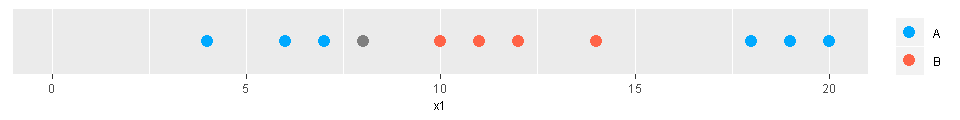

In [15]:
data = data.frame(x1=c(4,6,7,10,11,12,14, 18, 19, 20), class=c("A", "A", "A", "B", "B", "B", "B", "A", "A", "A"))
new = data.frame(x1=8)

row.arrange(data %>% captionx, new %>% captionx)

output_size(8,1)
ggplot(data) + xlim(0,20) +
geom_point(aes(x=x1, y=0, color=class)) + 
geom_point(aes(x=x1, y=0), data=new) +
theme.x_axis_only
output_size(restore)

#### Apply Kernel

Introduce a new variable by applying a kernel function to the original dataset.  This effectively increases the dimensionality of the dataset.  Here, we apply the kernel function $y = (x-12)^2$.

x1,y,class
4,64,A
6,36,A
7,25,A
10,4,B
11,1,B
12,0,B
14,4,B
18,36,A
19,49,A
20,64,A


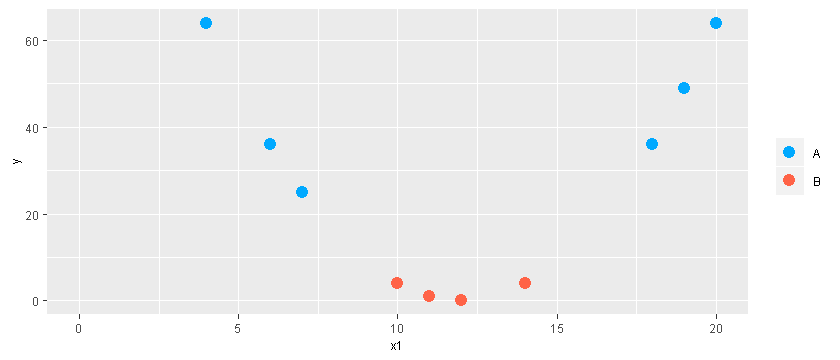

In [16]:
data$y = (data$x1-12)^2

data[, c(1,3,2)] %>% caption("data")

ggplot(data) + geom_point(aes(x=x1, y=y, color=class)) + xlim(0,20)

#### Find Support Vectors and Boundary

* **Support vectors** are those observations at the edge of the margin separating the classes, where the margin is maximized. 
* The **boundary** is the middle of the margin separating the classes (a line in 2-dimensional space).

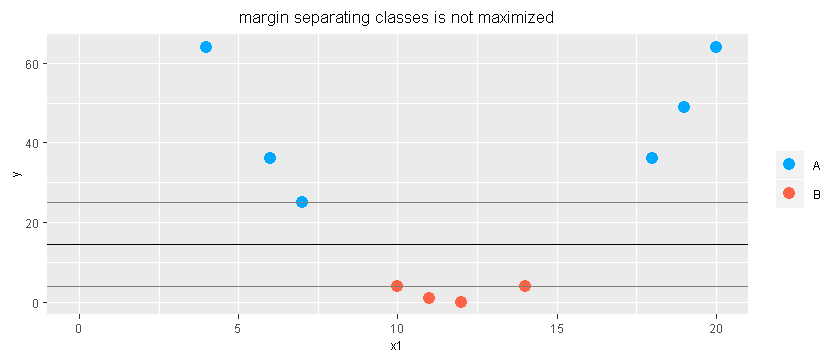

In [17]:
ggplot(data) + ggtitle("margin separating classes is not maximized") + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class)) +
geom_hline(aes(yintercept=data$y[3]), color="grey50") +
geom_hline(aes(yintercept=data$y[4]), color="grey50") +
geom_hline(aes(yintercept=mean(data$y[3:4])))

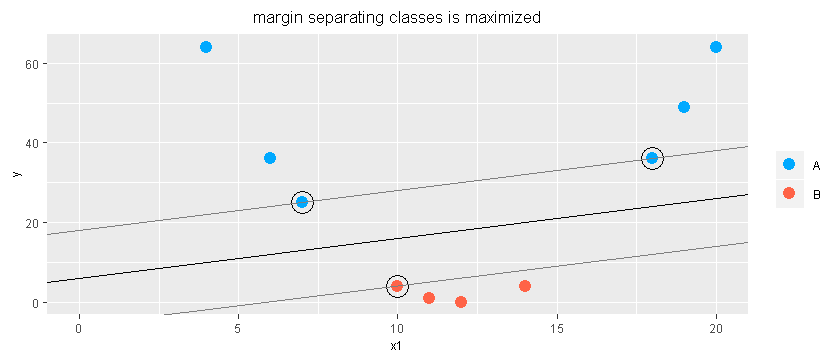

In [18]:
support_vectors = c(7,10,18)

m = (data$y[3] - data$y[8]) / (data$x1[3] - data$x1[8])
i.upper = -m*data$x1[3]+data$y[3]
i.lower = -m*data$x1[4]+data$y[4]
i = mean(c(i.upper, i.lower))

ggplot(data) + ggtitle("margin separating classes is maximized") + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_abline(aes(intercept=i.upper, slope=m), color="grey50") +
geom_abline(aes(intercept=i.lower, slope=m), color="grey50") +
geom_abline(aes(intercept=i, slope=m))

#### Score & Predict by Score Sign

Score a new observation based on its distance from the boundary and predict the new observation's class based on its score sign.

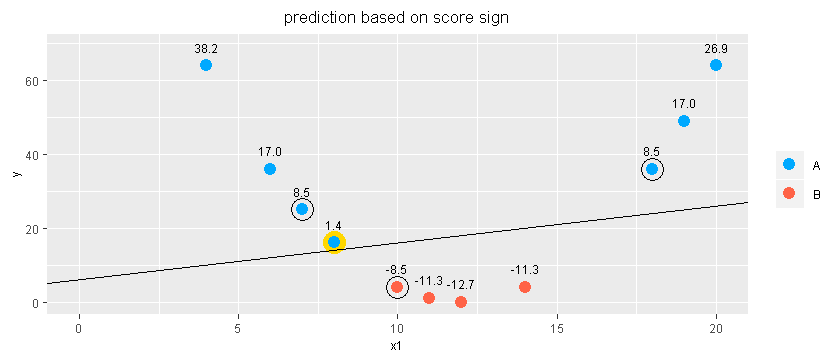

In [19]:
data.score = -(m*data$x1 -1*data$y + i) / sqrt(m^2 + (-1)^2)

new$y = (new$x1-12)^2
new.score = -(m*new$x1 -1*new$y + i) / sqrt(m^2 + (-1)^2)
new_color = if (sign(new_score) > 0) PALETTE[1] else PALETTE[2]

ggplot(data) + ggtitle("prediction based on score sign") + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_text(aes(x=x1, y=y, label=sprintf("%0.1f", data.score)), nudge_y=5) +
geom_point(aes(x=x1, y=y), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=y), data=new, color=new_color) +
geom_text(aes(x=x1, y=y, label=sprintf("%0.1f", new.score)), data=new, nudge_y=5) +
geom_abline(aes(intercept=i, slope=m))

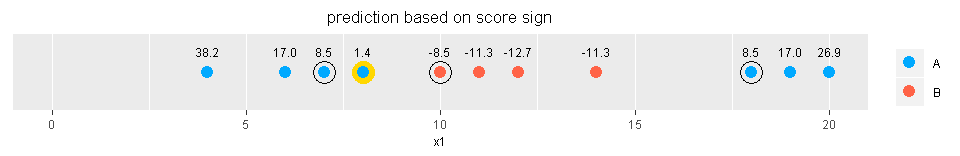

In [20]:
output_size(8,1.3)
ggplot(data) + ggtitle("prediction based on score sign") + xlim(0,20) + ylim(-0.5, 0.5) + 
geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_text(aes(x=x1, y=0, label=sprintf("%0.1f", data.score)), nudge_y=0.3) + 
geom_point(x=new$x1, y=0, size=6, color="gold") + geom_point(x=new$x1, y=0, color=new_color) +
geom_text(aes(x=new$x1, y=0, label=sprintf("%0.1f", new.score)), nudge_y=0.3) +
theme.x_axis_only 
output_size(restore)

#### Score & Predict by Probability 

Alternatively, assign probabilities to observations and based on their scores, and predict a new observation's class based on its probability.

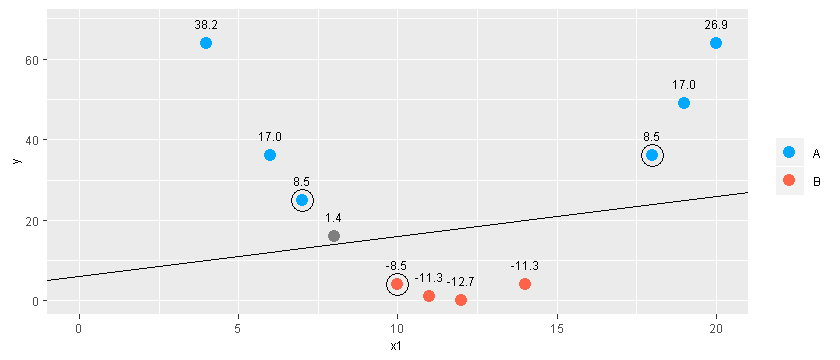

In [21]:
ggplot(data) + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_text(aes(x=x1, y=y, label=sprintf("%0.1f", data.score)), nudge_y=5) +
geom_point(aes(x=x1, y=y), data=new) +
geom_text(aes(x=x1, y=y, label=sprintf("%0.1f", new.score)), data=new, nudge_y=5) +
geom_abline(aes(intercept=i, slope=m))

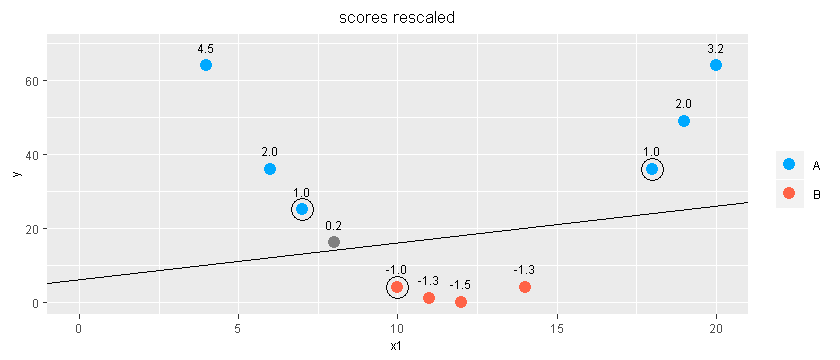

In [22]:
data.score.adj = data.score / data.score[3]
new.score.adj  = new.score / data.score[3]

ggplot(data) + ggtitle("scores rescaled") + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_text(aes(x=x1, y=y, label=sprintf("%0.1f", data.score.adj)), nudge_y=5) +
geom_point(aes(x=x1, y=y), data=new) +
geom_text(aes(x=x1, y=y, label=sprintf("%0.1f", new.score.adj)), data=new, nudge_y=5) +
geom_abline(aes(intercept=i, slope=m))

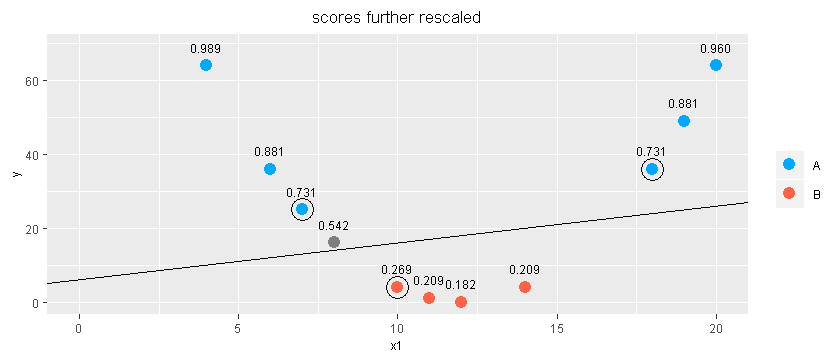

In [23]:
data.score.adj2 = sigmoid(data.score.adj)
new.score.adj2  = sigmoid(new.score.adj)

ggplot(data) + ggtitle("scores further rescaled") + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_text(aes(x=x1, y=y, label=sprintf("%0.3f", data.score.adj2)), nudge_y=5) +
geom_point(aes(x=new$x1, y=new$y)) +
geom_text(aes(x=new$x1, y=new$y, label=sprintf("%0.3f", new.score.adj2)), nudge_y=5) +
geom_abline(aes(intercept=i, slope=m))

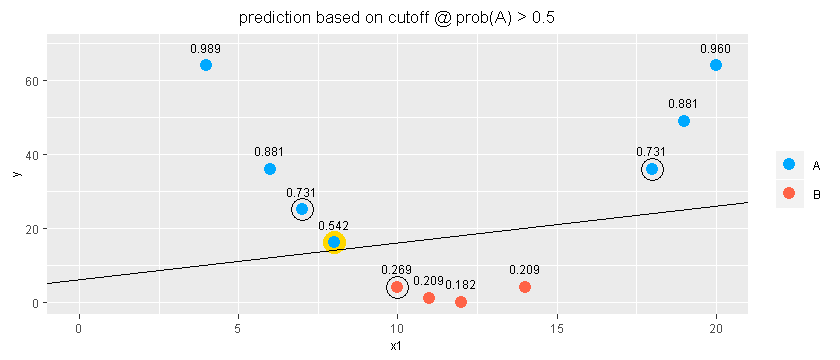

In [24]:
data.score.adj2 = sigmoid(data.score.adj)
new.score.adj2  = sigmoid(new.score.adj)

cutoff = 0.5
new_color = if(new.score.adj2 >= cutoff) PALETTE[1] else PALETTE[2]

ggplot(data) + ggtitle("prediction based on cutoff @ prob(A) > 0.5") + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_text(aes(x=x1, y=y, label=sprintf("%0.3f", data.score.adj2)), nudge_y=5) +
geom_point(aes(x=x1, y=y), data=new, size=6, color="gold") +
geom_point(aes(x=new$x1, y=new$y), color=new_color) +
geom_text(aes(x=new$x1, y=new$y, label=sprintf("%0.3f", new.score.adj2)), nudge_y=5) +
geom_abline(aes(intercept=i, slope=m))

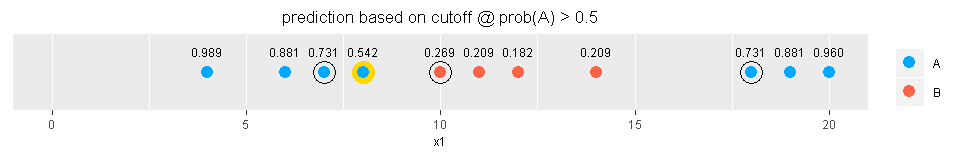

In [25]:
output_size(8,1.3)
ggplot(data) + ggtitle("prediction based on cutoff @ prob(A) > 0.5") + xlim(0,20) + ylim(-0.5,0.5) + 
geom_point(aes(x=x1, y=0, color=class)) + 
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_text(aes(x=x1, y=0, label=sprintf("%0.3f", data.score.adj2)), nudge_y=0.3) +
geom_point(aes(x=new$x1, y=0), size=6, color="gold") +
geom_point(aes(x=new$x1, y=0), color=new_color) +
geom_text(aes(x=new$x1, y=0, label=sprintf("%0.3f", new.score.adj2)), nudge_y=0.3) +
theme.x_axis_only
output_size(restore)

### SVM Applied to _Very_ Not Linearly Separable Data: Kernel Trick

#### Data

x1,class
1,B
2,B
4,A
6,A
7,A
10,B
11,B
12,B
14,B
18,A


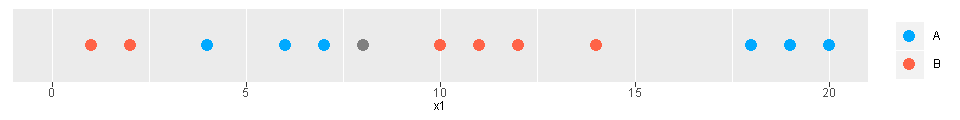

In [26]:
data = data.frame(x1=c(1,2, 4,6,7,10,11,12,14, 18, 19, 20), class=c("B", "B", "A", "A", "A", "B", "B", "B", "B", "A", "A", "A"))
new = data.frame(x1=8)

row.arrange(data %>% captionx, new %>% captionx)

output_size(8,1)
ggplot(data) + xlim(0,20) +
geom_point(aes(x=x1, y=0, color=class)) + 
geom_point(aes(x=x1, y=0), data=new) +
theme.x_axis_only
output_size(restore)

#### Apply Kernel

Introduce a new variable by applying a kernel function to the original dataset.  This effectively increases the dimensionality of the dataset.  Here, we apply the kernel function $y = -1.8 + 3.0x -0.4x^2 +0.1x^3$.

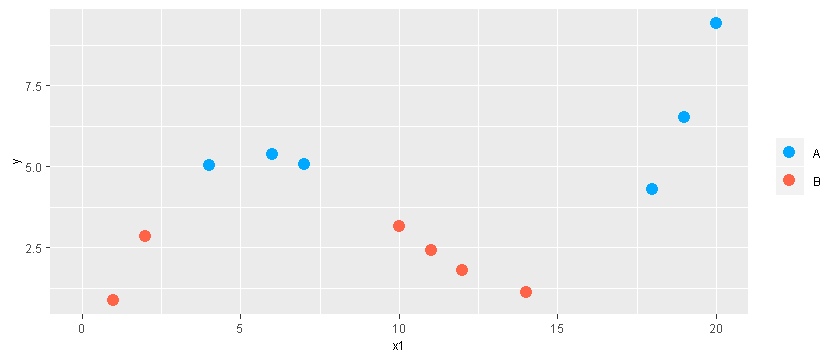

In [27]:
data$y = -1.80475 + 3.03815*data$x1 + -0.38481*data$x1^2 + 0.01305*data$x1^3

ggplot(data) + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class))

#### Find Support Vectors and Boundary

* **Support vectors** are those observations at the edge of the margin separating the classes, where the margin is maximized. 
* The **boundary** is the middle of the margin separating the classes (a line in 2-dimensional space).

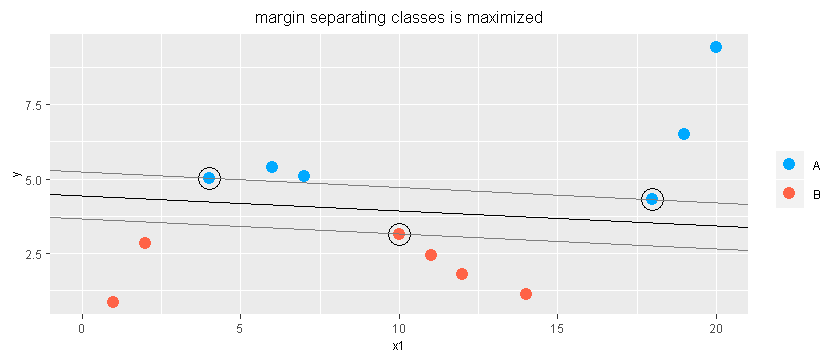

In [28]:
support_vectors = c(4,10,18)

m = (data$y[3] - data$y[10]) / (data$x1[3] - data$x1[10])
i.upper = -m*data$x1[3]+data$y[3]
i.lower = -m*data$x1[6]+data$y[6]
i = mean(c(i.upper, i.lower))

ggplot(data) + ggtitle("margin separating classes is maximized") + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_abline(aes(intercept=i.upper, slope=m), color="grey50") +
geom_abline(aes(intercept=i.lower, slope=m), color="grey50") +
geom_abline(aes(intercept=i, slope=m))

#### Score & Predict by Score Sign

Score a new observation based on its distance from the boundary and predict the new observation's class based on its score sign.

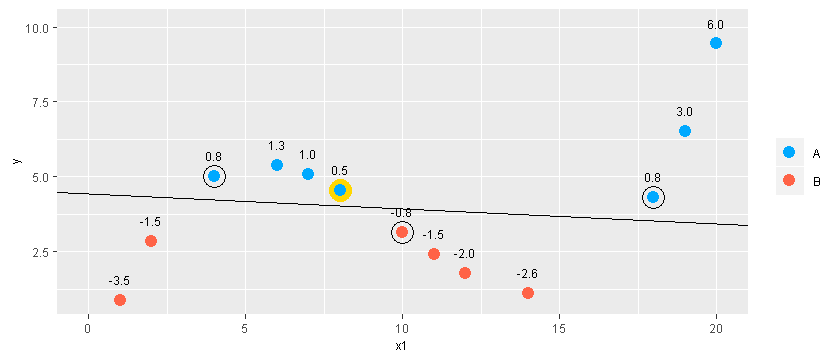

In [29]:
data.score = -(m*data$x1 -1*data$y + i) / sqrt(m^2 + (-1)^2)

new$y = -1.80475 + 3.03815*new$x1 + -0.38481*new$x1^2 + 0.01305*new$x1^3
new.score = -(m*new$x1 -1*new$y + i) / sqrt(m^2 + (-1)^2)
new_color = if(sign(new_score) > 0) PALETTE[1] else PALETTE[2]

ggplot(data) + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_text(aes(x=x1, y=y, label=sprintf("%0.1f", data.score)), nudge_y=0.7) +
geom_point(aes(x=x1, y=y), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=y), data=new, color=new_color) +
geom_text(aes(x=x1, y=y, label=sprintf("%0.1f", new.score)), data=new, nudge_y=0.7) +
geom_abline(aes(intercept=i, slope=m))

#### Score & Predict by Probability 

Alternatively, assign probabilities to observations and based on their scores, and predict a new observation's class based on its probability.

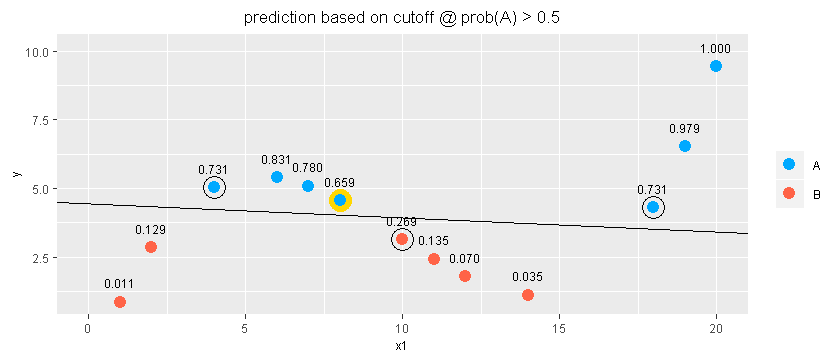

In [30]:
data.score.adj = data.score / data.score[3]
new.score.adj  = new.score / data.score[3]

data.score.adj2 = sigmoid(data.score.adj)
new.score.adj2  = sigmoid(new.score.adj)

cutoff = 0.5
new_color = if(new.score.adj2 >= cutoff) PALETTE[1] else PALETTE[2]

ggplot(data) + ggtitle("prediction based on cutoff @ prob(A) > 0.5") + xlim(0,20) +
geom_point(aes(x=x1, y=y, color=class)) +
geom_point(aes(x=x1, y=y), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_text(aes(x=x1, y=y, label=sprintf("%0.3f", data.score.adj2)), nudge_y=0.7) +
geom_point(aes(x=x1, y=y), data=new, size=6, color="gold") +
geom_point(aes(x=x1, y=y), data=new, color=new_color) +
geom_text(aes(x=x1, y=y, label=sprintf("%0.3f", new.score.adj2)), data=new, nudge_y=0.7) +
geom_abline(aes(intercept=i, slope=m))

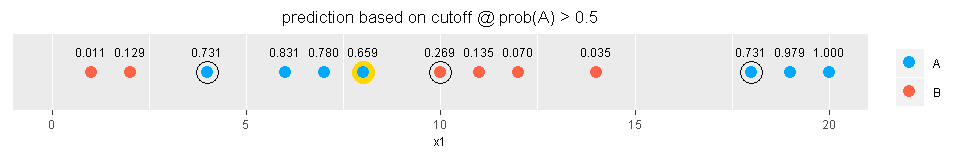

In [31]:
output_size(8,1.3)
ggplot(data) + ggtitle("prediction based on cutoff @ prob(A) > 0.5") + xlim(0,20) + ylim(-0.5,0.5) +
geom_point(aes(x=x1, y=0, color=class)) +
geom_point(aes(x=x1, y=0), data=data[data$x1 %in% support_vectors,], shape=1, size=6, color="black") +
geom_text(aes(x=x1, y=0, label=sprintf("%0.3f", data.score.adj2)), nudge_y=0.3) +
geom_point(aes(x=new$x1, y=0), size=6, color="gold") +
geom_point(aes(x=new$x1, y=0), color=new_color) +
geom_text(aes(x=new$x1, y=0, label=sprintf("%0.3f", new.score.adj2)), nudge_y=0.3) +
theme.x_axis_only
output_size(restore)

### SVM Applied to Not Linearly Separable Data with 2 Variables: Kernel Trick

#### Data

x1,x2,class
0,3,A
1,5,A
1,6,A
2,6,A
4,7,A
5,7,A
7,0,A
7,4,A
7,5,A
8,2,A


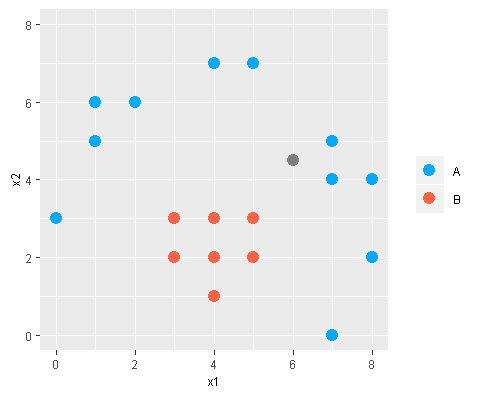

In [32]:
data = data.frame(x1=c(0,1,1,2,4,5,7,7,7,8,8,  3,3,4,4,4,5,5),
                  x2=c(3,5,6,6,7,7,0,4,5,2,4,  2,3,1,2,3,2,3),
                  class=c("A","A","A","A","A","A","A","A","A","A","A",  "B","B","B","B","B","B","B"))
new = data.frame(x1=6, x2=4.5)

row.arrange(data %>% captionx, new %>% captionx)

output_size(4,3.3)
ggplot(data) + xlim(0,8) + ylim(0,8) +
geom_point(aes(x=x1, y=x2, color=class)) +
geom_point(aes(x=x1, y=x2), data=new)
output_size(restore)

#### Apply Kernel

Introduce a new variable by applying a kernel function to the original dataset.  This effectively increases the dimensionality of the dataset.  Here, we apply the kernel function $z = (x1-4)^2 + (x2-2)^2$.

In [33]:
data$z = (data$x1-4)^2 + (data$x2-2)^2
color = rep(NA,nrow(data))
color[data$class=="A"] = PALETTE[1]
color[data$class=="B"] = PALETTE[2]

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","z")], type="s", col=color, xlim=c(-5,12), ylim=c(-5,12), zlim=c(0, 30))
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

HTML widgets cannot be represented in plain text (need html)

#### Find Support Vectors and Boundary

* **Support vectors** are those observations at the edge of the margin separating the classes, where the margin is maximized. 
* The **boundary** is the middle of the margin separating the classes (a plane in 3-dimensional space).

In [34]:
# Compute boundary and margin planes based on support vectors 1, 2, 8, 14
p1 = as.numeric(data[1,c("x1","x2","z")])
p2 = as.numeric(data[2,c("x1","x2","z")])
p8 = as.numeric(data[8,c("x1","x2","z")])
p14 = as.numeric(data[14,c("x1","x2","z")])
v1 = p8 - p1
v2 = p2 - p1
cp = cross(v1, v2)
a = cp[1]
b = cp[2]
c = cp[3]
d1 = -dot(cp, p8)
d2 = -dot(cp, p14)
d = mean(c(d1,d2))


# Functions to computer some other other surfaces
           
kernel = function(x,y) { (x-4)^2 + (y-2)^2 }
                        
separator = function(x,y) { plane.z = -(a*x+b*y+d)/c
                            kernel.z = (x-4)^2 + (y-2)^2
                            separator.z = plane.z
                            separator.z[kernel.z > plane.z] = NA
                            separator.z }
                        
separator_shadow = function(x,y) { plane.z = -(a*x+b*y+d)/c
                                   kernel.z = (x-4)^2 + (y-2)^2
                                   separator.z = plane.z
                                   separator.z[kernel.z > plane.z] = NA
                                   separator.z[kernel.z <= plane.z] = 0  
                                   separator.z }                       
                                       
                        
# "Christmas Tree" plot

p = open3d(); view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","z")], type="s", col=color, xlim=c(-5,12), ylim=c(-5,12), zlim=c(0, 30))
plot3d(kernel, xlim=c(-5,12), ylim=c(-5,12), zlim=c(0,30), col="green", alpha=0.3, add=TRUE)
planes3d(a,b,c,d1, alpha=0.2)
planes3d(a,b,c,d2, alpha=0.2)
planes3d(a,b,c,d, color="blue", alpha=0.5)
plot3d(separator, xlim=c(-5,12), ylim=c(-5,12), zlim=c(0,30), col="grey",  alpha=0.5, add=TRUE)
plot3d(separator_shadow, xlim=c(-5,12), ylim=c(-5,12), zlim=c(0,30), col="grey",  alpha=1, add=TRUE)                          
grid3d(c("x","y","z"))
rglwidget(elementId="myplot", width=400, height=400)

HTML widgets cannot be represented in plain text (need html)

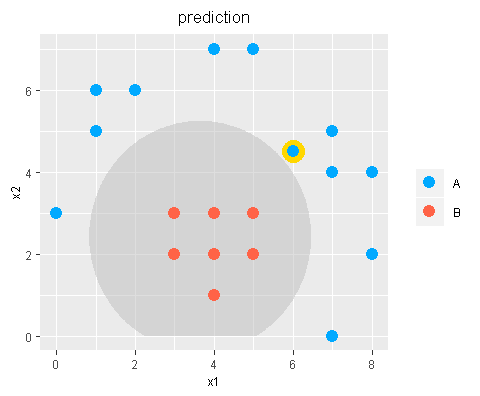

In [35]:
seq.x = seq(0,8,0.01)
seq.y = seq(0,7,0.01)
boundary = matrix(nrow=length(seq.x), ncol=length(seq.y))                       
rownames(boundary) = seq.x
colnames(boundary) = seq.y
for (i in 1:length(seq.x)) for (j in 1:length(seq.y)) boundary[i,j] = separator_shadow(seq.x[i],seq.y[j])
boundary.long = melt(boundary)

output_size(4,3.3)
ggplot() + ggtitle("prediction") + xlab("x1") + ylab("x2") +
geom_tile(aes(x=Var1, y=Var2, fill=factor(value)), data=boundary.long, alpha=0.5) +
scale_fill_manual(values=c("gray",NA), guide="none") +
geom_point(aes(x=x1, y=x2, color=class), data=data) +
geom_point(aes(x=new$x1, y=new$x2), size=6, color="gold") +
geom_point(aes(x=new$x1, y=new$x2), color=PALETTE[1])
output_size(restore)

### Hyper-Parameters for Support Vector Machine

* kernel
  * linear
  * polynomial
    * degree: $x^2$, $x^3$, $x^4$, etc.
    * gamma: affects magnitude of kernel
    * coefficient: affects offset of kernel
  * radial basis (gaussian)
    * gamma = $\frac{1}{2\sigma^2}$: inverse standard deviation squared (variance) used for gaussian
  * hyperbolic tangent
    * coefficient
  * other kernels
* cost
* scale: normalized or not normalized
* tolerance: affects optimization
* epsilon: affects penalty calculation
* probability computation method
* other hyper-parameters   

## Code

### Useful Functions

In [36]:
# as.class # from appartus code cell above

# help(predict.svm, package="e1071") # use predict to call this function
# help(svm, package="e1071")

### Templates

In [37]:
# Construct an SVM model

data.train = data.frame(x1=c(1,2,3,4,5,6,7,8), x2=c(9,7,6,5,4,3,2,1), x3=c(1,1,2,2,3,3,4,4),
                        class=c("A", "B", "A", "B", "A", "B", "A", "B"))

model = svm(class ~ x1+x2+x3, data.train, type="C-classification", kernel="polynomial", degree=3, coef0=0, gamma=0.25, cost=10, scale=FALSE, probability=TRUE)
summary(model)
model$SV


Call:
svm(formula = class ~ x1 + x2 + x3, data = data.train, type = "C-classification", 
    kernel = "polynomial", degree = 3, coef0 = 0, gamma = 0.25, cost = 10, 
    probability = TRUE, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  10 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  6

 ( 2 4 )


Number of Classes:  2 

Levels: 
 A B




,x1,x2,x3
3,3,6,2
5,5,4,3
2,2,7,1
4,4,5,2
6,6,3,3
8,8,1,4


In [38]:
# Use an SVM model to make predictions

new = data.frame(x1=c(5,6,7,8), x2=c(8,7,6,5), x3=c(1,5,2,6))
cutoff = 0.6

prob = attr(predict(model, new, probability=TRUE), "probabilities")
prediction = as.class(prob, "A", cutoff)

prob %>% caption
prediction %>% fmt
cbind(new, prediction)

A,B
0.3292402,0.6707598
0.0014808,0.9985192
0.3284723,0.6715277
0.0014587,0.9985413


prediction
B
B
B
B


x1,x2,x3,prediction
5,8,1,B
6,7,5,B
7,6,2,B
8,5,6,B


## Expectations

Know about this:
* How support vectors are determined in SVM model construction.
* How kernel and cost affect SVM model construction.
* How to build an SVM model based on classified data, and use it to predict the classes of new observations, using R's `svm` and `predict` functions.

## Further Reading

* http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf (chapter 9)
* https://www.youtube.com/watch?v=N1vOgolbjSc
* https://www.youtube.com/watch?v=-Z4aojJ-pdg
* http://mccormickml.com/2013/04/16/trivial-svm-example/
* http://ciml.info/dl/v0_99/ciml-v0_99-ch11.pdf
* https://www.youtube.com/watch?v=1NxnPkZM9bc&t=11s
* https://www.csie.ntu.edu.tw/~cjlin/libsvm/
* https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
* https://stats.stackexchange.com/questions/59301/how-to-interpret-the-model-parameters-of-libsvm-via-matlab-interface
* https://stackoverflow.com/questions/45048282/probability-and-classification-in-svm-function-of-e1071-package-in-r
* http://scikit-learn.org/stable/modules/svm.html
* https://www.jstatsoft.org/article/view/v015i09/v15i09.pdf
* https://en.m.wikipedia.org/wiki/Platt_scaling
* https://www.analyticsvidhya.com/blog/2016/07/platt-scaling-isotonic-regression-minimize-logloss-error/
* https://en.wikipedia.org/wiki/Support_vector_machine
* https://stats.stackexchange.com/questions/302567/why-is-it-wrong-to-interpret-svm-as-classification-probabilities
* https://cran.r-project.org/web/packages/e1071/vignettes/svmdoc.pdf
* https://www.datacamp.com/community/tutorials/support-vector-machines-r
* https://stackoverflow.com/questions/37366282/what-is-the-random-or-non-deterministic-factor-inside-svm-prediction-by-probab

<p style="text-align:left; font-size:10px;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float:right;">
Document revised October 17, 2019
</span>
</p>